In [26]:
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


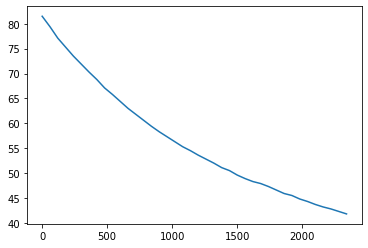

In [27]:
arquivo = pd.read_excel("Proj2 - Experimento_dados.xlsx")
arquivo.head()
tagua_lista = list(arquivo['Tágua (oC)'])
tagua_lista.pop(0)

Trec_lista = list(arquivo['Txic (oC)'])
lista_t_exp = np.arange(0,2400,60)
plt.plot(lista_t_exp,tagua_lista)

In [28]:
#Dimensões do recipiente
hi=9*1e-2
he= 9.5 *1e-2
dia=8*1e-2
diae=9*1e-2
As = pi*(dia/2)**2 # Area superficie (m2)
Ape=(2*pi*(diae/2))*he # Area de contato externa (m2)
Api = (2*pi*(dia/2))*hi # Area de contato do recipiente CERÂMICA (m2)
Vr = As*hi # (m3)

hs = 38 # Coeficiente de convecção do ar
Ta = 24+273.15 # Temperatura ambiente 
dr = 0.25 * 1e-2 # Metade da espessura do recipiente (m)
Kr = 0.92 #Coeficiente de condução do recipiente CERÂMICA

da = 997 #densidade da agua (kg/m3) 

ma = da*Vr  # Massa da água (kg)
ca = 4186 # calor específico da água (J/(kg.K)
mr = 0.200 # Massa do recipiente
cr = 850 # Calor específico do recipiente 
# emissividade da cerâmica = 0.9

# Constante de resistência do Material 
Rr = dr/(Kr*Api)
Rp = 1/(hs*Ape)

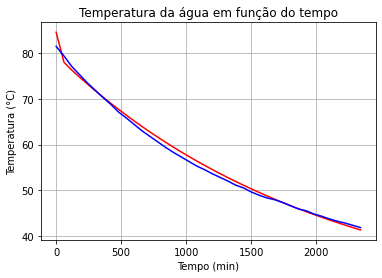

In [29]:
def modelo(x, t):
    Tagua = x[0]
    Tr = x[1]

    Q1 = (Tagua-Tr)/Rr
    Q2 = (Tr - Ta)/(Rr + Rp) 
    Q3 = (Tagua-Ta)/(1/(hs*As))

    dTaguadt = (1/(ma*ca))*(-Q1-Q3)
    dTrdt = (1/(mr*cr))*(Q1-Q2)
    dxdt = [dTaguadt, dTrdt]
    return dxdt 

dt = 60 
lista_t = np.arange(0, 60*40, dt)

Tr_0 = 84.6 +273.15
Tagua_0 = 84.6 +273.15
x_0 = [Tr_0, Tagua_0]

x = odeint(modelo, x_0, lista_t)
Tr_lista = x[:,0]
Tagua_lista = x[:, 1]
# Gráficos 
plt.plot(lista_t, Tagua_lista-273.15,color='red')
plt.plot(lista_t_exp,tagua_lista,color='blue')
plt.title('Temperatura da água em função do tempo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (min)')
plt.grid(True)
plt.show()  

In [96]:
# VARIÁVEIS DE RECIPIENTES
# Cerâmica[0](Alumina), Vidro[1](Borossilicato), Plástico-Polypropylene[2]


Kr = [0.92, 1.15 , 0.44,6.87] #Coeficiente de condução do recipiente (W/(m.K))
# 430-560, 7-19.84 ,24.5

# 451-955, 0.83, 1.6-2.5 
cr = [955, 669.888, 1700, 903] # Calor específico do recipiente  (J/(kg.K)

# Volume xícara (m3) - IGUAL PARA TODOS

densidades = [3.8e3,2.23e4,1.07e3] # Densidade (kg/m3)
def massa_recipientes(densidades, V):
    mr = []# Massa do recipiente (kg)
    for d in densidades:
        m = d*V
        mr.append(m)

    return mr # Massa (Kg)


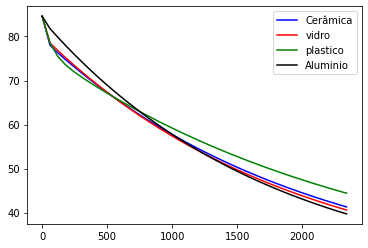

In [97]:
#Grafico conclusivo


def modelo2(x, t):
    Tagua = x[0]
    Tr = x[1]
    Rr = dr/(Kr[1]*Api)
    Q1 = (Tagua-Tr)/Rr
    Q2 = (Tr - Ta)/(Rr + Rp) 
    Q3 = (Tagua-Ta)/(1/(hs*As))

    dTaguadt = (1/(ma*ca))*(-Q1-Q3)
    dTrdt = (1/(mr*cr[1]))*(Q1-Q2)
    dxdt = [dTaguadt, dTrdt]
    return dxdt 
def modelo3(x, t):
    Tagua = x[0]
    Tr = x[1]
    Rr = dr/(Kr[2]*Api)
    Q1 = (Tagua-Tr)/Rr
    Q2 = (Tr - Ta)/(Rr + Rp) 
    Q3 = (Tagua-Ta)/(1/(hs*As))

    dTaguadt = (1/(ma*ca))*(-Q1-Q3)
    dTrdt = (1/(mr*cr[2]))*(Q1-Q2)
    dxdt = [dTaguadt, dTrdt]
    return dxdt 
def modelo4(x, t):
    Tagua = x[0]
    Tr = x[1]
    Rr = dr/(Kr[3]*Api)
    Q1 = (Tagua-Tr)/Rr
    Q2 = (Tr - Ta)/(Rr + Rp) 
    Q3 = (Tagua-Ta)/(1/(hs*As))

    dTaguadt = (1/(ma*ca))*(-Q1-Q3)
    dTrdt = (1/(mr*cr[3]))*(Q1-Q2)
    dxdt = [dTaguadt, dTrdt]
    return dxdt 

colors = ['yellow','red','blue']
x = odeint(modelo2, x_0, lista_t)
Tagua_lista_vidro = x[:, 1]
y = odeint(modelo3, x_0,lista_t)
Tagua_lista_plastico = y[:,1]
z = odeint(modelo4, x_0,lista_t)
Tagua_lista_aluminio = z[:,1]
plt.plot(lista_t,Tagua_lista-273.15,color='blue',label='Cerâmica')
plt.plot(lista_t, Tagua_lista_vidro-273.15,color='red',label='vidro')
plt.plot(lista_t, Tagua_lista_plastico-273.15, color='green',label='plastico')
plt.plot(lista_t, Tagua_lista_aluminio-273.15, color='black',label='Aluminio')

plt.legend()
plt.show()



In [86]:
#Assim podemos perceber que a mudança do materia n altera tanto a perda de calor assim podemos teorizar que a perda de maior importancia é para o ar.
